In [1]:
from pathlib import Path
import scipy
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm
import scipy.stats as stats
from scipy.interpolate import InterpolatedUnivariateSpline, BSpline, CubicSpline, make_lsq_spline, make_interp_spline

In [10]:
file = r"../data/SSCURVES.xlsx"

In [11]:
sheet = pd.read_excel(file, sheet_name=0, header=0)

In [12]:
def sigmoid (x, A, h, slope, C):
    """https://stackoverflow.com/a/55104465"""
    return 1 / (1 + np.exp ((x - h) / slope)) *  A + C

(0.0, 12.0)

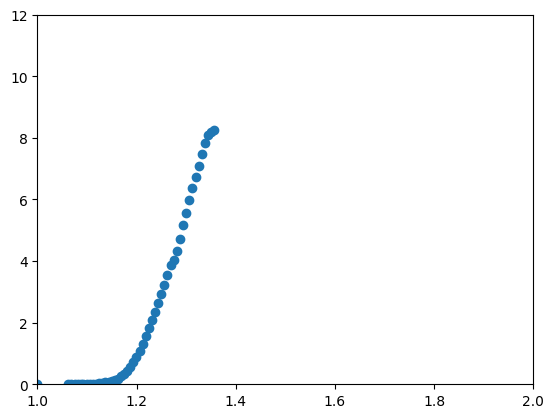

In [13]:
x_data = sheet['Strain']
y_data = sheet['Stress']
plt.scatter(x_data, y_data)
plt.xlim([1, 2])
plt.ylim([0, 12])

(0.0, 12.0)

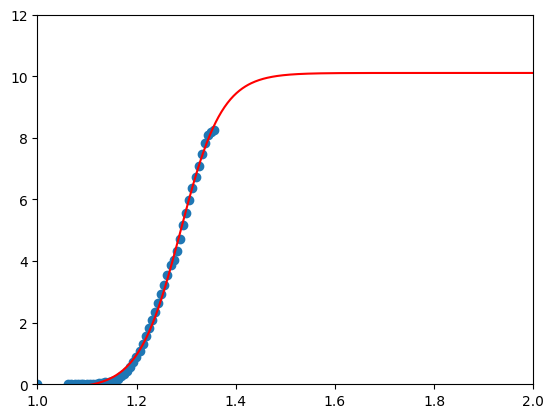

In [14]:
# Fitting the model.
popt, pcov = curve_fit(sigmoid, x_data, y_data)

# Display model fit.
x = np.linspace(0, 2, 1000)
plt.scatter(x_data, y_data)
plt.plot(x, sigmoid(x, *popt), 'r-', label='fit: A=%5.3f, H=%5.3f, slope=%5.3f, c=%5.3f' % tuple(popt))
plt.xlim([1, 2])
plt.ylim([0, 12])

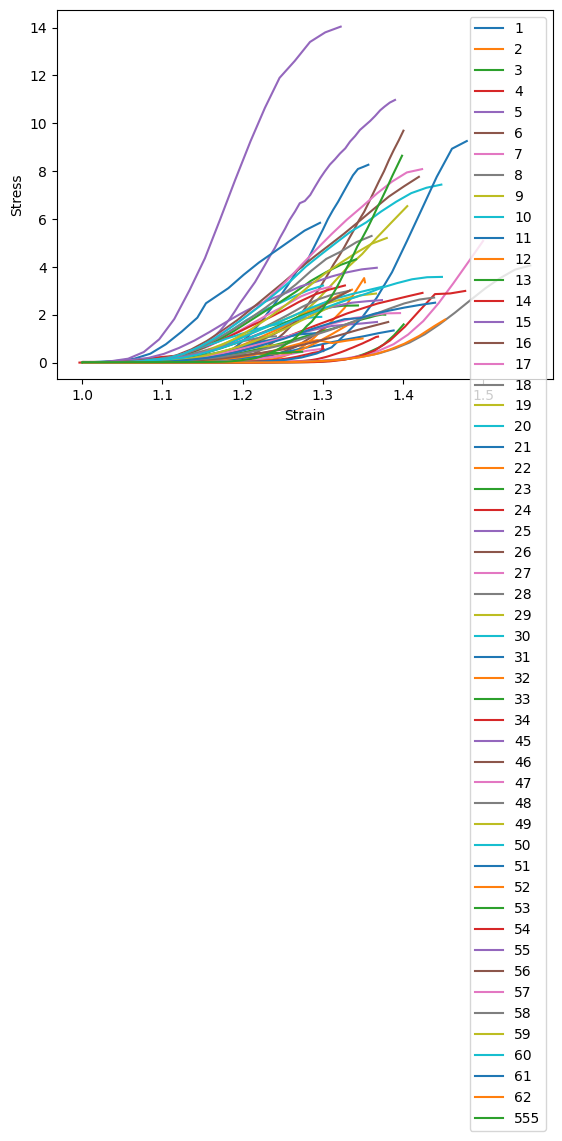

In [15]:
xls = pd.ExcelFile(file)
for sheet in xls.sheet_names:
    
    df = pd.read_excel(file, sheet_name=sheet)
    df = df.groupby("Strain", as_index=False).agg('mean', numeric_only=True)
    df = df.dropna(subset=['Strain', 'Stress'])

    if len(df) < 15:
        continue

    x_data = df['Strain']
    y_data = df['Stress']
    plt.xlabel("Strain")
    plt.ylabel("Stress")
    plt.plot(x_data, y_data, label=sheet)

plt.legend()
plt.show()

 16%|█▋        | 8/49 [00:00<00:03, 11.86it/s]

Duplicate strain entries found for sheet 5. Not calculating spline
Duplicate strain entries found for sheet 6. Not calculating spline


 20%|██        | 10/49 [00:00<00:03, 12.91it/s]

Duplicate strain entries found for sheet 9. Not calculating spline
Duplicate strain entries found for sheet 11. Not calculating spline
Duplicate strain entries found for sheet 12. Not calculating spline


 33%|███▎      | 16/49 [00:01<00:02, 14.54it/s]

Duplicate strain entries found for sheet 16. Not calculating spline
Duplicate strain entries found for sheet 17. Not calculating spline


 61%|██████    | 30/49 [00:02<00:01, 14.99it/s]

Duplicate strain entries found for sheet 27. Not calculating spline
Duplicate strain entries found for sheet 28. Not calculating spline
Duplicate strain entries found for sheet 30. Not calculating spline


 65%|██████▌   | 32/49 [00:02<00:01, 15.15it/s]

Duplicate strain entries found for sheet 32. Not calculating spline


 73%|███████▎  | 36/49 [00:02<00:01, 11.81it/s]

Duplicate strain entries found for sheet 34. Not calculating spline
Duplicate strain entries found for sheet 37. Not calculating spline


100%|██████████| 49/49 [00:03<00:00, 12.80it/s]


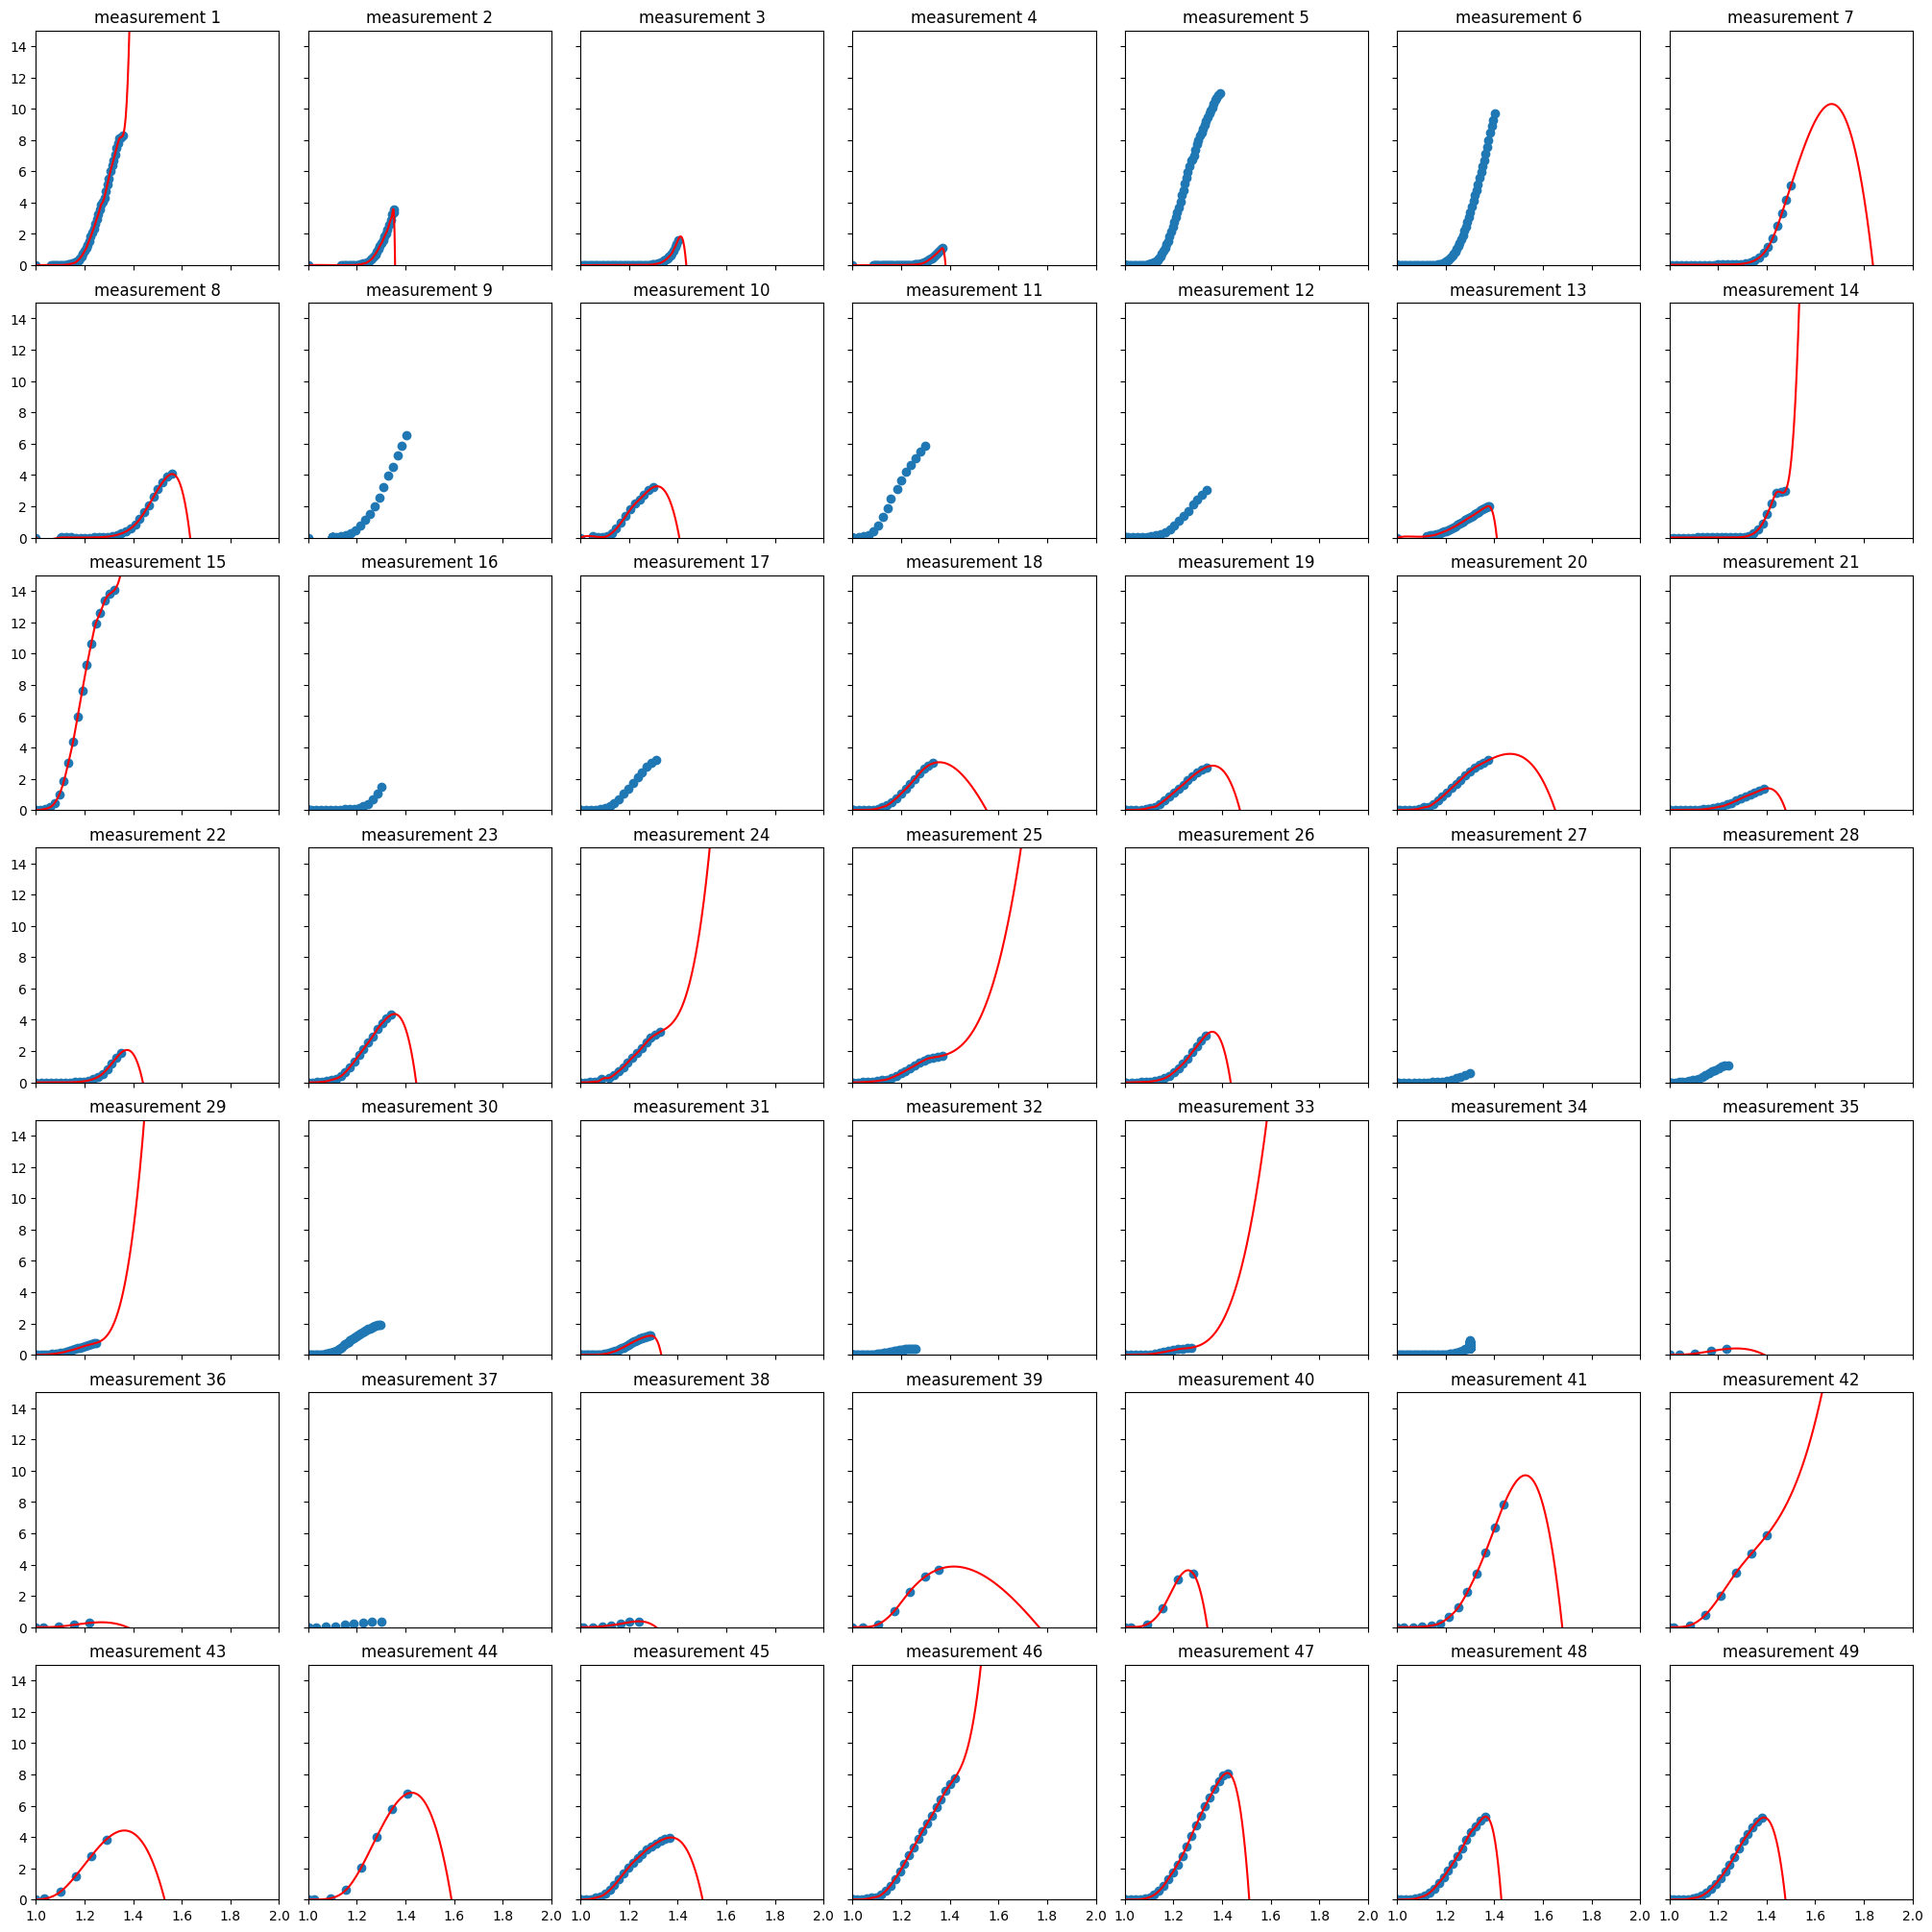

In [16]:
xls = pd.ExcelFile(file)
num_of_rows_cols = int(np.sqrt(len(xls.sheet_names)))

x = np.linspace(0, 2, 1000)

fig, axs = plt.subplots(ncols=num_of_rows_cols, nrows=num_of_rows_cols, figsize=(20, 20),
                        layout="constrained", sharex=True, sharey=True)

for sheet, ax in tqdm(zip(xls.sheet_names, axs.flat), total=num_of_rows_cols**2):
    df = pd.read_excel(file, sheet_name=sheet)
    df = df.dropna(subset=['Strain', 'Stress'])

    x_data = df['Strain']
    y_data = df['Stress']
    ax.scatter(x_data, y_data)

    if not all(i < j for i, j in zip(x_data, x_data[1:])):
        print(f"Duplicate strain entries found for sheet {sheet}. Not calculating spline")
    else:
        # To make a spline. Doesn't work. Expects always increasing strain.
        # t = [-1, 0, 1]
        # k=3
        # t = np.r_[(x[0],) * (k+1), t, (x[-1],) * (k+1)]

        spl = InterpolatedUnivariateSpline(x_data, y_data)
        ax.plot(x, spl(x), 'r-')
        
    #     ax.plot(x, spl(x), 'r-')

    # To fit a sigmoid.
    # popt, pcov = curve_fit(sigmoid, x_data, y_data, maxfev=10000)
    # ax.plot(x, sigmoid(x, *popt), '-', label='fit: A=%5.3f, H=%5.3f, slope=%5.3f, c=%5.3f' % tuple(popt))

    ax.set_title(f"measurement {sheet}")
    ax.set_xlim([1, 2])
    ax.set_ylim([0, 15])

plt.show()
    

 71%|███████▏  | 35/49 [00:06<00:03,  4.12it/s]/scistor/guest/sjg203/.conda/envs/stress-strain/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
100%|██████████| 49/49 [00:16<00:00,  3.06it/s]


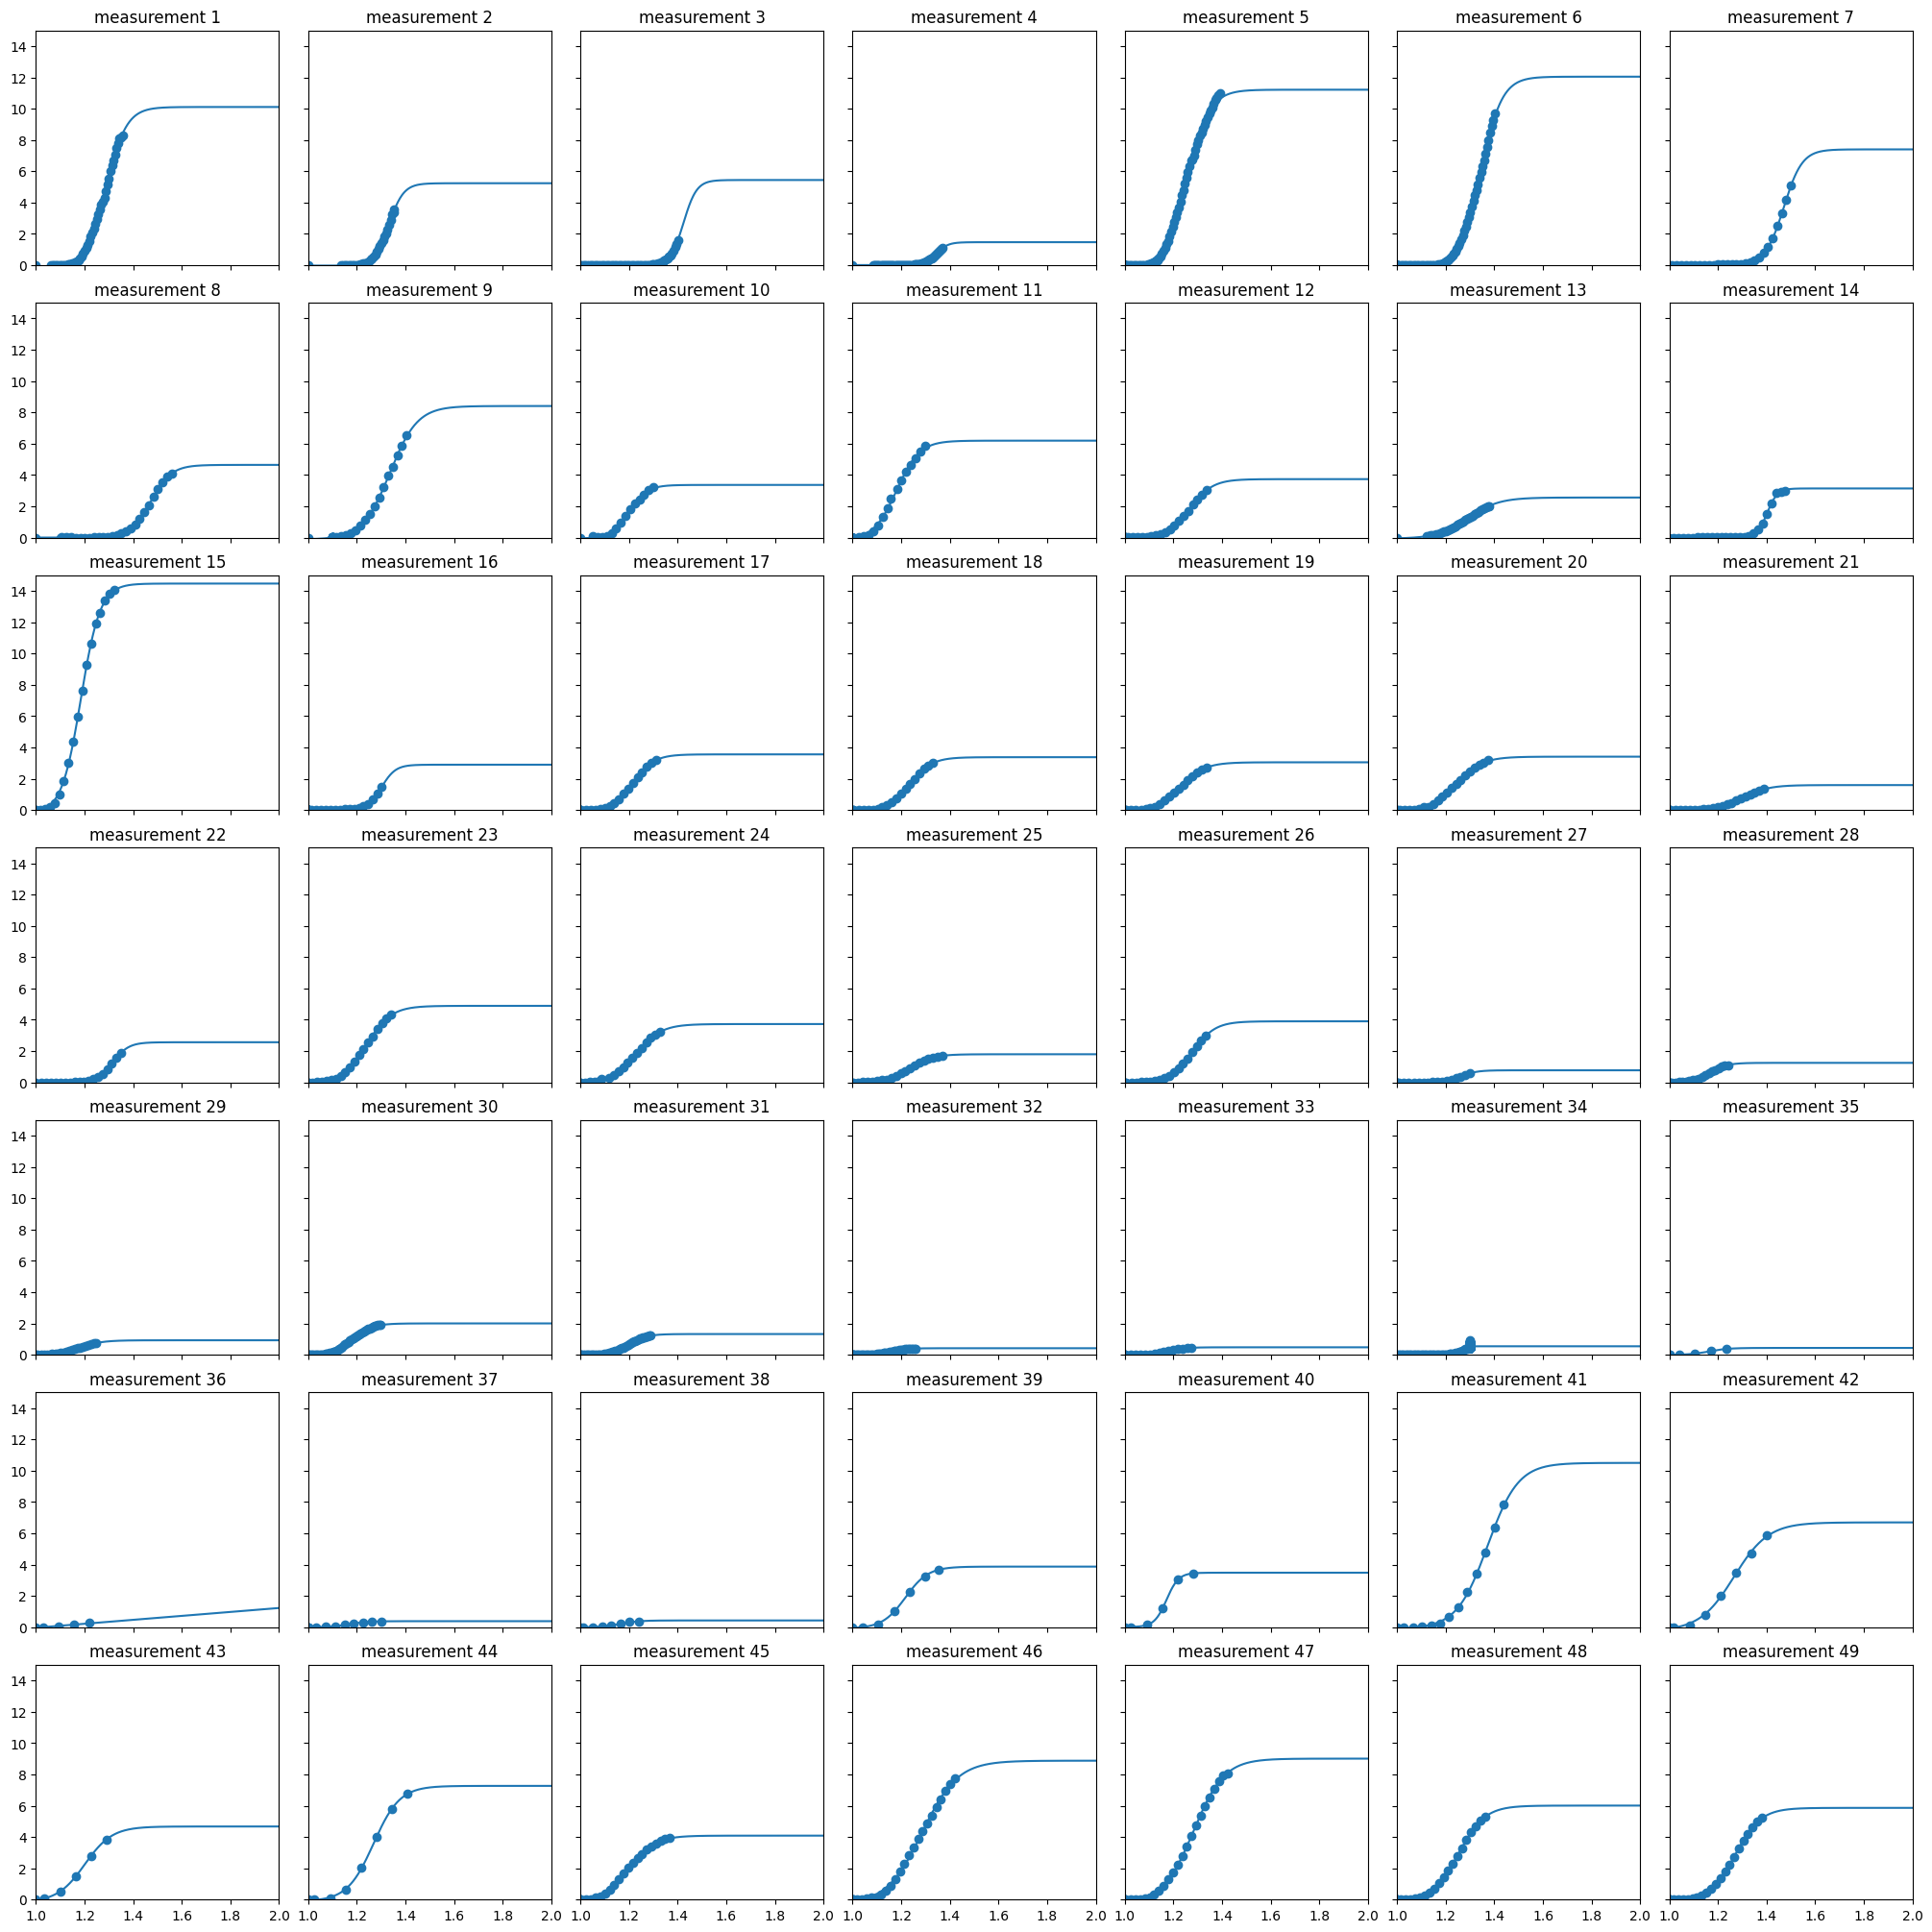

In [9]:
xls = pd.ExcelFile(file)
num_of_rows_cols = int(np.sqrt(len(xls.sheet_names)))

x = np.linspace(0, 2, 1000)

fig, axs = plt.subplots(ncols=num_of_rows_cols, nrows=num_of_rows_cols, figsize=(20, 20),
                        layout="constrained", sharex=True, sharey=True)

for sheet, ax in tqdm(zip(xls.sheet_names, axs.flat), total=num_of_rows_cols**2):
    df = pd.read_excel(file, sheet_name=sheet)
    df = df.dropna(subset=['Strain', 'Stress'])

    x_data = df['Strain']
    y_data = df['Stress']
    ax.scatter(x_data, y_data)

    # if not all(i < j for i, j in zip(x_data, x_data[1:])):
    #     print(f"Duplicate strain entries found for sheet {sheet}. Not calculating spline")
    # else:
    #     # To make a spline. Doesn't work. Expects always increasing strain.
    #     # t = [-1, 0, 1]
    #     # k=3
    #     # t = np.r_[(x[0],) * (k+1), t, (x[-1],) * (k+1)]

    #     spl = InterpolatedUnivariateSpline(x_data, y_data)
    #     ax.plot(x, spl(x), 'r-')
        
    #     ax.plot(x, spl(x), 'r-')

    # To fit a sigmoid.
    popt, pcov = curve_fit(sigmoid, x_data, y_data, maxfev=10000)
    ax.plot(x, sigmoid(x, *popt), '-', label='fit: A=%5.3f, H=%5.3f, slope=%5.3f, c=%5.3f' % tuple(popt))

    ax.set_title(f"measurement {sheet}")
    ax.set_xlim([1, 2])
    ax.set_ylim([0, 15])

plt.show()
    